<a href="https://colab.research.google.com/github/alessandranerylima/data_science/blob/main/Cen%C3%A1rio_A_Predi%C3%A7%C3%A3o_PLD_hor%C3%A1rio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Critérios**

Base de DADOS - 17/04/2018 a 07/03/2022

treino: 17/04/2018 a 31/12/2021
teste: 01/01/2022 a 07/03/2022

previsão horas: 744

ax.set_xlim(pd.to_datetime(['2021-01-01', '2022-03-07']))

Cross Validation 100 dias dos dados.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
c_sudeste = pd.read_csv('/content/c_sudeste_A.csv')
c_sudeste=c_sudeste.drop(columns=['Unnamed: 0'])
c_sudeste.head()

,y,ds
0,40.16,2018-04-17 00:00:00
1,40.16,2018-04-17 01:00:00
2,40.16,2018-04-17 02:00:00
3,40.16,2018-04-17 03:00:00
4,40.16,2018-04-17 04:00:00


In [ ]:
treino= c_sudeste[c_sudeste.ds<'2022-01-01']
treino

,y,ds
0,40.16,2018-04-17 00:00:00
1,40.16,2018-04-17 01:00:00
2,40.16,2018-04-17 02:00:00
3,40.16,2018-04-17 03:00:00
4,40.16,2018-04-17 04:00:00
...,...,...
32179,67.81,2021-12-31 19:00:00
32180,67.67,2021-12-31 20:00:00
32181,67.56,2021-12-31 21:00:00
32182,65.34,2021-12-31 22:00:00


In [ ]:
teste= c_sudeste[c_sudeste.ds>='2022-01-01']
teste

,y,ds
32184,55.7,2022-01-01 00:00:00
32185,55.7,2022-01-01 01:00:00
32186,55.7,2022-01-01 02:00:00
32187,55.7,2022-01-01 03:00:00
32188,55.7,2022-01-01 04:00:00
...,...,...
33763,55.7,2022-03-07 19:00:00
33764,55.7,2022-03-07 20:00:00
33765,55.7,2022-03-07 21:00:00
33766,55.7,2022-03-07 22:00:00


# 1. **Análise de Dados**

In [ ]:
#Plotando os dados para obter uma primeira impressão sobre o que estamos lidando.

#fig = go.Figure()

# Criando e traçando estilo
#fig.add_trace(go.Scatter(x=c_sudeste['ds'], y=c_sudeste['y'], name='PLD'))
#fig.show()

# Criando gráfico
trace = go.Scatter(x = c_sudeste['ds'],
                   y = c_sudeste['y'])

# Armazenando gráfico em uma lista
data = [trace]
# Criando Layout
layout = go.Layout(yaxis={'title':'PLD'},
                   xaxis={'title': 'Período'})
# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)
# Exibindo figura/gráfico
py.iplot(fig)

# **2. Escolha da abordagem de ML**

Foram construídas quatro séries temporais indexadas pelo momento da cotação.

O modelo de previsão de séries temporais será aplicado apenas  no dataframe do subemercado Sudeste-CO

Para tanto, faremos uso do pacote Prophet para configurar e treinar o modelo em na série (Submercados:Sudeste/CO) - gerando previsões.

Prophet segue a API modelo sklearn. É criada uma instância da classe Prophet e, em seguida, faz-se o ajuste (fit) e os métodos preditivos (predict).

A entrada para o Prophet é sempre um dataframe com duas colunas: ds e y. Sendo que coluna ds (datestamp) formatada idealmente YYYY-MM-DD para uma data ou YYYY-MM-DD HH:MM:SS para um timestamp ( para leitura do Pandas).

A coluna y é necessariamente numérica, representando a medida que se deseja fazer a previsão.

In [ ]:
# Primeiramente vamos importar os dados:
from fbprophet import Prophet

In [ ]:
treino.dtypes

y     float64
ds     object
dtype: object

In [ ]:
# Ajustaremos o modelo para instanciar um novo objeto Prophet.
# Em seguida, chamaremos o  método de ajuste e passaremos o dataframe histórico da série temporal submercado  Sudeste- CO

m_sudeste = Prophet()
m_sudeste.fit(treino)

### **3. Previsões das Séries Temporais**

Foram realizadas as previsões em um dataframe com uma coluna 'ds' contendo as datas e horas para as quais uma previsão deve ser feita.

Com isso, é possível obter um dataframe adequado que se estende para o futuro mostrando um número específico de dias e horas usando o método auxiliar qual seja: Prophet.make_future_dataframe.

Por padrão, o dataframe incluirá as datas e horas do histórico e desta forma veremos o modelo se ajustando bem.

In [ ]:
# Faremos uma previsão de 1584 horas no submercado Sudeste/CO:
#( Dúvida: Importante entender qual seria o horizonte de predição de horas na utilização do PLD para os tomadores de decisões no mercado de curto prazo)

future_sudeste = m_sudeste.make_future_dataframe(periods=1200, freq='H')
future_sudeste

,ds
0,2018-04-17 00:00:00
1,2018-04-17 01:00:00
2,2018-04-17 02:00:00
3,2018-04-17 03:00:00
4,2018-04-17 04:00:00
...,...
33379,2022-02-19 19:00:00
33380,2022-02-19 20:00:00
33381,2022-02-19 21:00:00
33382,2022-02-19 22:00:00


Por meio do  método predict será atribuída a cada linha no futuro um valor predito nomeado por  'yhat'.

Se você passar em datas históricas, ele irá fornecer um ajuste na amostra.

O objeto de previsão (forecast) denota um novo dataframe que inclui a coluna 'yhat' com a previsão, bem como colunas para componentes e intervalos de incerteza ('yhat_lower' e	'yhat_upper')

In [ ]:
forecast_sudeste = m_sudeste.predict(future_sudeste)
forecast_sudeste[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(-20)

,ds,yhat,yhat_lower,yhat_upper
20,2018-04-17 20:00:00,121.126361,52.126211,189.098813
21,2018-04-17 21:00:00,120.224822,53.051873,184.272279
22,2018-04-17 22:00:00,116.616998,52.288582,180.817846
23,2018-04-17 23:00:00,110.185301,45.401011,175.744448
24,2018-04-18 00:00:00,102.337366,37.550483,172.117480
...,...,...,...,...
33379,2022-02-19 19:00:00,230.648409,72.722412,447.278310
33380,2022-02-19 20:00:00,230.024348,65.823985,446.581278
33381,2022-02-19 21:00:00,227.981579,60.227074,440.197723
33382,2022-02-19 22:00:00,223.266643,66.742069,431.654883


É possível representar graficamente o forecast  chamando o método Prophet.plot e passando em seu dataframe previsão.

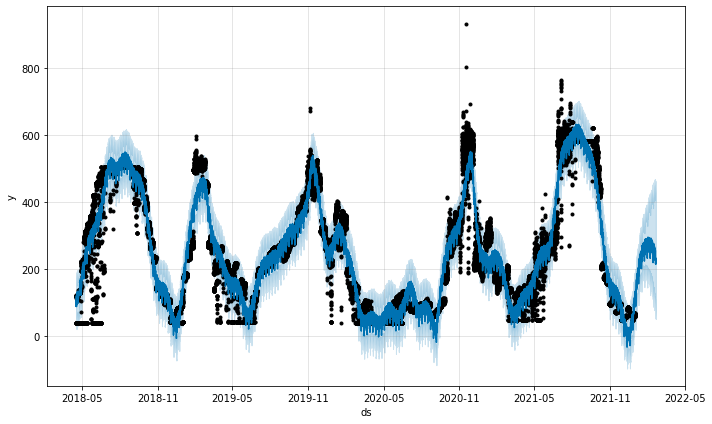

In [ ]:
#@title Texto de título padrão
fig1_sudeste = m_sudeste.plot(forecast_sudeste)

In [ ]:
fig = m_sudeste.plot(forecast_sudeste)
ax = fig.gca()
ax.set_xlim(pd.to_datetime(['2021-01-01', '2022-03-07']))
# ax.set_ylim([26, 29])
plt.show()

In [ ]:
# comparativo entre os dados reais (teste) e os previstos pelo modelo
n = teste.shape[0]
fig = go.Figure()
fig.add_trace(go.Scatter(x=teste['ds'], y=teste['y'], name='real'))
fig.add_trace(go.Scatter(x=forecast_sudeste['ds'][-n:], y=forecast_sudeste['yhat'][-n:], name='previsto'))
fig.show()

In [ ]:
# cálculo do erro entre os dados de teste e as previsões
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE: ', mean_absolute_error(teste['y'], forecast_sudeste['yhat'][-n:]))
#print('MSE: ', mean_squared_error(teste['y'], forecast_sudeste['yhat'][-n:]))
print('RMSE: ', np.sqrt(mean_squared_error(teste['y'], forecast_sudeste['yhat'][-n:])))

Para visualizar os componentes de previsão utilizamos o método Prophet.plot_components.

Por padrão, é possível visualizar a  tendência, a sazonalidade anual e a sazonalidade semanal da série cronológica.Se incluir feriados, também os verá aqui.


A partir do modelo Prophet é verificado a existência de previsão composto por:

(1)	Tendência (que se preocupa com as mudanças não periódicas nos valores) observa-se que não há uma tendência definida na série cronológica analisada.

(2) Sazonalidade semanal há mudanças periódicas dos valores aos finais de semana.
(3) Sazonalidade anual as mudanças periódicas dos valores anuais sofrem picos de julho a novembro.

(4) ) Sazonalidade diária queda no valores às 3h25 com valores crescentes alcançando o pico às 20h34.


In [ ]:
fig2_sudeste = m_sudeste.plot_components(forecast_sudeste)

Por meio do plotly temos acesso a uma figura interativa da previsão e dos componentes.

É necessário instalar plotly 4.0 ou acima separadamente, já que não é por padrão instalado com o Prophet.

É preciso instalar os pacotes notebook e ipywidgets.

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_sudeste, forecast_sudeste)

In [ ]:
#Você também pode adicionar pontos de mudança (onde o modelo de tendência está mudando) para o gráfico como este:
from fbprophet.plot import add_changepoints_to_plot
fig = m_sudeste.plot(forecast_sudeste)
a = add_changepoints_to_plot(fig.gca(), m_sudeste, forecast_sudeste)

Este gráfico do Prophet não contém todos os pontos de mudança, apenas os mais importantes. Se você quiser ver todos eles, você pode usar o seguinte código

In [ ]:
# Listando todos os change points no modelo
deltas = m_sudeste.params['delta'].mean(0)
cp = pd.DataFrame(m_sudeste.changepoints)
cp['deltas'] = deltas
fig = go.Figure()
# Criar e traçar estilo
fig.add_trace(go.Bar(x=cp['ds'], y=cp['deltas'], name='CPs',))

# **4. Validando Resultados (Cross Validation)**

O Prophet inclui a funcionalidade de validação cruzada para medir o erro de previsão para dados históricos.

Isto é feito selecionando pontos de corte (cutoff points) no histórico temporal e, para cada um deles, adaptar o modelo utilizando apenas dados até esse ponto de corte.

Podemos então comparar os valores previstos com os valores reais.



In [ ]:
from fbprophet.diagnostics import cross_validation


# Ajuste o modelo com 100 dias dos dados.

df_cv = cross_validation(m_sudeste, horizon = '100 days')
df_cv.head(-10)

# **5. Alcançando métricas de desempenho.**

O utilitário performance_metrics pode ser usado para calcular algumas estatísticas úteis do desempenho de previsão (yhat, yhat_lower, e yhat_upper em comparação com y) em função da distância do corte (a que distância no futuro estava a previsão).

As estatísticas calculadas são erro quadrático médio (MSE), raiz erro quadrático médio (RMSE), erro absoluto médio (MAE), erro percentual absoluto médio (MAPE), erro percentual absoluto médio (MDAPE) e cobertura das estimativas yhat_lower e yhat_upper.

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

Métricas de desempenho de validação cruzada podem ser visualizadas com plot_cross_validation_metric, aqui mostrado para MAPE.

Os pontos mostram o erro percentual absoluto para cada previsão em df_cv. A linha azul mostra o MAPE, onde a média é tomada sobre uma janela rolante dos pontos

Vemos para esta previsão que erros em torno de 5% são típicos para previsões de um mês no futuro, e que os erros aumentam até cerca de 11% para previsões que são um ano fora.

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

O tamanho da janela de rolamento na figura pode ser alterado com o argumento opcional rolling_window ,que especifica a proporção de previsões a utilizar em cada janela móvel.

O padrão é 0.1, correspondendo a 10% das linhas de df_cv incluídas em cada janela; aumentando isso levará a uma curva média mais suave na figura.